# Atividade 4

## Equipe:

* Felipe Getúlio Laranjeira do Nascimento
* Lucas Pereira Reis

## Importação das bibliotecas

In [103]:
import pandas as pd
import numpy as np
import combination as comb
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

## Realizando a leitura do *dataset*

In [104]:
df = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
df.columns = ["area","perimeter","compactness",
              "length_kernel","width_kernel","asymmetry_coefficient",
              "length_kernel_groove","variety"]

# Analisando o Dataset

### 1. Histograma do atributo alvo

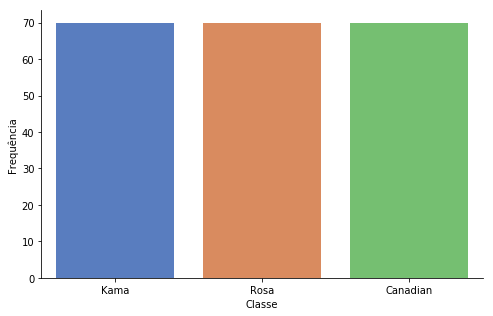

In [105]:
target_name = "variety"
g = sns.catplot(x=target_name, data=df, kind="count", palette="muted", height=4.5, aspect=1.5)
g.set_xticklabels(['Kama', 'Rosa', 'Canadian'])
g.set_axis_labels("Classe", "Frequência")

### 2. Heatmap da correlação de Pearson dos atributos do dataset

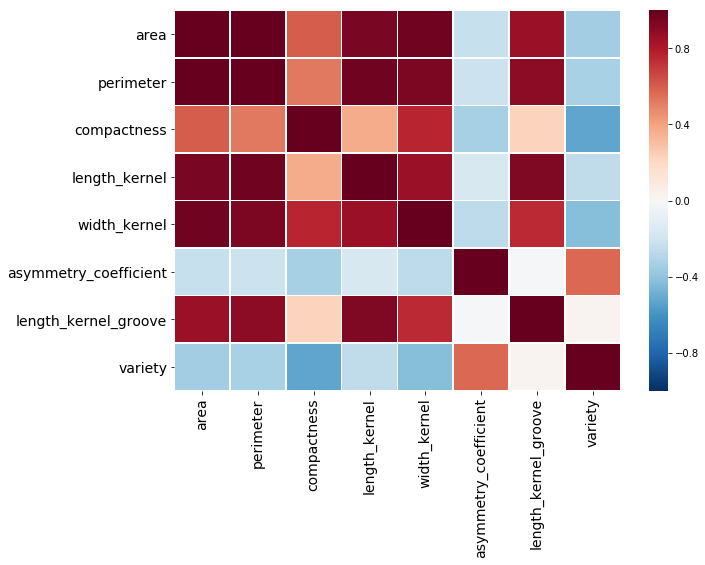

In [106]:
plt.figure(figsize = (10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1,linewidths=.5, cmap = "RdBu_r")

# Pré-Processamento de Dados

In [107]:
target = df.variety
df.drop(['variety'],axis=1,inplace=True)

In [108]:
n_i = len(df.columns) #numero de neuronios na camada de entrada
n_o = 3 #numero de neuronios na camada de saida (sujeito a mudanças)

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(df,target,test_size=0.3)

In [110]:
def geometric_pyramid(alpha):
    return alpha*sqrt(n_i*n_o)

#### Observação:
Para um `alpha = 2` ou `alpha = 3` o algoritmo para gerar o subconjunto fica bastante pesado. Talvez seja necessário diminuir o valor de `n_i` retirando colunas desnecessárias ou utilizar PCA. Coloquei `alpha = 1` apenas para testar

In [111]:
alpha = [0.5,1]
n_h = [ceil(geometric_pyramid(a)) for a in alpha]
hidden_layer_sizes = []

for n in n_h:
    subsets = comb.partitions(n)
    hidden_layer_sizes = hidden_layer_sizes + subsets

# Paramêtros para a busca em grade

#### Observação:
Professora pediu pra explicar porquê utilizou tal `solver` para a rede neural. Ela disse que apenas um serviria para o projeto, precisa-se procurar saber qual é

In [112]:
params = {
    'activation': ['identity', 'logistic','tanh','relu'],
    'hidden_layer_sizes': hidden_layer_sizes,
    'solver': ['lbfgs']
}

# Busca em Grade

In [113]:
gs = GridSearchCV(MLPClassifier(), params, cv=3, scoring='accuracy', return_train_score=1)

In [114]:
X,y = df,target

In [115]:
gs.fit(X,y);

In [116]:
pd.DataFrame(gs.cv_results_).drop('params', 1).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.086101,0.020765,0.000664,4.695171e-04,identity,"(3, 2)",lbfgs,0.972222,0.985507,0.855072,0.938095,0.058332,1,0.992754,0.964539,1.000000,0.985764,0.015297
0,0.047206,0.011527,0.000333,4.710332e-04,identity,"(3,)",lbfgs,0.972222,0.971014,0.855072,0.933333,0.054749,2,0.985507,0.964539,1.000000,0.983349,0.014557
12,0.065824,0.002155,0.000665,4.701903e-04,identity,"(2, 3)",lbfgs,0.958333,0.985507,0.826087,0.923810,0.069261,3,0.963768,0.964539,0.971631,0.966646,0.003539
4,0.066819,0.024591,0.000997,1.123916e-07,identity,"(5,)",lbfgs,0.944444,0.971014,0.826087,0.914286,0.062651,4,0.985507,0.964539,1.000000,0.983349,0.014557
24,0.057512,0.002053,0.000665,4.703026e-04,logistic,"(5,)",lbfgs,0.902778,0.956522,0.811594,0.890476,0.059411,5,0.956522,0.978723,0.950355,0.961867,0.012183


In [117]:
best_model = gs.best_estimator_

In [118]:
Y_pred = best_model.predict(X_test)

In [119]:
accuracy_score(Y_test,Y_pred)

0.9841269841269841

# Exportando para *Markdown*

In [120]:
!jupyter nbconvert Atividade_4.ipynb --to markdown --output resolucao-atividade-4.md

[NbConvertApp] Converting notebook Atividade_4.ipynb to markdown
[NbConvertApp] Support files will be in resolucao-atividade-4_files\
[NbConvertApp] Making directory resolucao-atividade-4_files
[NbConvertApp] Making directory resolucao-atividade-4_files
[NbConvertApp] Writing 6940 bytes to resolucao-atividade-4.md
